<a href="https://colab.research.google.com/github/remabreu/DiamondsPrices/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Análise de Dados e Boas Práticas
**Name**: Rodrigo Eduardo Abreu

**Dataset**: [Diamond Prices][def]

[def]: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

### Problem Description

Diamond prices is a multi-featured dataset that contains Diamonds characteristics and measurements to define its price. The main target of the dataset is to provide adequate information to predict the diamond prices given the attributes that best correlates with the price change.
As part of the exercise, in summary, it will be initially performed an exploratory data analysis to indetify pattenrs, special data behavior, correlations, possible outliers as also, but not limited to, find empty or zero variables to next execute the pre-proecessing of the dataset which includes data wrangling and needed transformations to prepare the data to be applied ML models.

The Diamond Prices is a typical problem for predictive analysis fitting into **supervised regression learning** in which input variables are used to predict a **target variable**, the price of the diamond.

**Regression** is a statistical analysis technique that estimates relationships between variables. Regression is useful to determine patterns in large datasets to determine the correlation between inputs.


### Data Selection and Features

The Diamond dataset is a common and well known regression problem in [Kaggle](https://www.kaggle.com). The Dataset is in the latest updated version and contains `53943` records and `11` Features (one of the attributes is the index and has no relationship with the data analysis).

The Data Dictionary and its attributes are described in detail in the [README](https://github.com/remabreu/DiamondsPrices/blob/main/README.md) file.

### Hypotesis and relevant questions

- Which values from the **4Cs** have more impact defining a diamond price?
- How about `table` and `width`? What are their relationship with diamond prices and other features in the dataset?
- Is it possible to identify any pattern defining diamond prices and variables relationship?



### Libraries used

Library imports required for data analysis, visualization and preprocessing.
It also loads the Diamonds dataset from Kaggle repositories

In [1]:
# Kaggle Library to download the lastest and most updated dataset.
import kagglehub
# main Python library for EDA
import pandas as pd
import numpy as np
#Imports for graphical charts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/diamonds-prices")

print("Path to dataset file:", path)

100%|██████████| 711k/711k [00:00<00:00, 120MB/s]

Extracting files...
Path to dataset file: /root/.cache/kagglehub/datasets/nancyalaswad90/diamonds-prices/versions/4


In [4]:
#Store the dataset into a Dataframe object
diamonds_df = pd.read_csv(path+"/Diamonds Prices2022.csv")

type(diamonds_df)

pandas.core.frame.DataFrame

In [5]:
#initial rows to have a grasp of the data
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# last rows
diamonds_df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


### Initial Exploratory Data Analysis

This sections aims to identify, the amount of lines, columns, their corresponding type and other relevant info.
- Lines: `53943`
- Columns: `11` - Column `Unnamed: 0` corresponds only to indexing, irrelavant to the analysis - can be removed
- Null values: `none`
- Types: `float64(6), int64(2), categorical(3)`

In [7]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


##### Considerations of Descriptive Statictics
- x, y, z have some of their values equal to 0, but the amount is insignificant (only 20 records in total) compared to the whole set of data. So, action is required.
- Price column seems to have a long tail to the right (max value is around $18K). The mean, standard devion and mainly, the coeficient of variance equal to `1` suggest prices stretch over a very wide range as well as it is expcted a high relative variability. Therefore, the mean is not a good representation value is the data.
- Carat also suggests high variability, but no tail is observed from the coeficient of variance once it is between 0.3 and 1.0.
- Depth and Table suggest very low variability and tightly clustered
- Carat and Price columns may also suggest a significant amount of outliers due to the high variability. More variability usually leads to more _statistical outliers_, and in the diamonds dataset that is exactly what is observed for price and, to a lesser extent, carat. The interquartile range (IQR) method calculates the outliers (other possible method to be applied is the z-scores). There are around 6.6% and 3.5% outliers on the Price and Carat tables.
- It is important to understnad these values are either real observations and thefore must remain part of the further analysis or simply a flaw in the measurement and these outliers must be removed from the dataset.

Later, these assumptions will be graphically confirmed and demonstrated.

In [16]:
# verify the amount of diamond meausrements have zero value (x, y, z)
print("", ((diamonds_df['x'] == 0) | (diamonds_df['y'] == 0) | (diamonds_df['z'] == 0)).sum())

 20


In [9]:
#make sure there is no duplicated row
df = diamonds_df[diamonds_df.duplicated()]
df.empty

True

In [19]:
# drop first column, ignore error in case culumn doesn't exist (already removed)
diamonds_df = diamonds_df.drop('Unnamed: 0', axis=1, errors='ignore')
# looking at descriptive statistics, including also categorical variables for convenience
diamonds_df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53943.000000,53943,53943,53943,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13067,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797935,NaN,NaN,NaN,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,NaN,NaN,NaN,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000


In [20]:
# the mode is the value that appears most frequently in a dataset
diamonds_df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


In [21]:
#The median is the middle value in which divides the dataset in half
# (50% less than to the central point and 50% being greater of it).

numeric_df = diamonds_df.select_dtypes(include=['number'])
numeric_df.median()

,0
carat,0.70
depth,61.80
table,57.00
price,2401.00
x,5.70
y,5.71
z,3.53


In [22]:
# The coeficient of variant indicates the relative variability, expressed as the ratio of the standard deviation to the mean.
# Generally, the the CV is categorized into ranges to indicate the degree of data variability.
# Low Variability: < 0.1
# Medium Variability: between 0.1 and 0.2
# High Variability: between 0.3 and 1.0
# Very high variability or strong skew: > 1.0
def coeficient_variation(std_dev, avg, var):
    cv = std_dev/avg
    print(var, "- Coeficient of Variance:", "{:.2f}".format(cv))

coeficient_variation(diamonds_df['price'].std(), diamonds_df['price'].mean(), 'price')
coeficient_variation(diamonds_df['carat'].std(), diamonds_df['carat'].mean(), 'carat')
coeficient_variation(diamonds_df['depth'].std(), diamonds_df['depth'].mean(), 'depth')
coeficient_variation(diamonds_df['table'].std(), diamonds_df['table'].mean(), 'table')

price - Coeficient of Variance: 1.01
carat - Coeficient of Variance: 0.59
depth - Coeficient of Variance: 0.02
table - Coeficient of Variance: 0.04


In [23]:
# calculate how many outliers are present on the vairables price and carat.
# Initially, it is required to calculte the interquartile range (IQR) by finding
# the first and third quartiles (Q1 and Q3), calculating the IQR (Q3-Q1)
# Determine outlier boundaries:
# Lower bound: Q1 - 1.5 * IQR
# Upper bound: Q3 + 1.5 * IQR
for col in ['price', 'carat']:
    Q1, Q3 = diamonds_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    n_out = (diamonds_df[col] > upper).sum()
    print(f"{col}: {n_out} out of {len(diamonds_df)} rows (~{n_out/len(diamonds_df):.1%}) - values from {upper} to {diamonds_df[col].max()}")

price: 3540 out of 53943 rows (~6.6%) - values from 11885.0 to 18823
carat: 1889 out of 53943 rows (~3.5%) - values from 2.0 to 5.01


#### Categorical variables analysis and their raltionship with price and carat

There are 3 categorical variables, ```cut```, ```color``` and ```clarity``` that along with ```carat``` (the 4Cs), best define a diamond price.
Let's initially analyse the distribution of diamonds classification among all these categories throughtout the bar charts below.

From the bar charts and heatmap, easyly to distiguish that diamnds are grouped on:
- cut is more orirented to quality,
- color is centred on G–H (G–H stones dominate because they look near‑colorless, but don't suffer spansion of price)
- clarity peaks in the middle.

Therefore, the Ideal cut, G color color and VS2 clarity the dominate diamonds in the portfolio. This might lead to a higher consumer demand with stones following such characterisitcs.

One important observation is about the boxplots comparisons between price vs categorical feautres as well as price vs categorical features. As the quality of the diamonds reduces, the mean price of the diamonds increase. That is very unusual and unexpected because, normally higher prices are associated to higher quality. But why does this behavior is observed?

By observiving the boxplots related to carat vs cut, color and clarity. For increasing quality, the mean of the carat reduces. That is, the higher the quality of the diamond, the lighter and smaller it will be.

That is the reason the best quality diamonds are less pricy, meaning they are smaller than the lower grade diamonds. Thus, it is feasible to infer from this that carat size is more an influence for the price of a diamond than its quality.

As an example, another important observation, despite the inventory concentratse more on "Ideal" diamonds the boxplots indicate the "Premium" ones have higher prices. Taking a closer look, Ideal diamonds are considerably smaller/lighter than Premium ones, reiforcing the inference that carat has stronger influence over the price.


In [24]:
#display all values of category features
categories = diamonds_df.select_dtypes(include='object').columns

[print("Column", c, "category values", diamonds_df[c].unique()) for c in categories]


Column cut category values ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Column color category values ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Column clarity category values ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


[None, None, None]

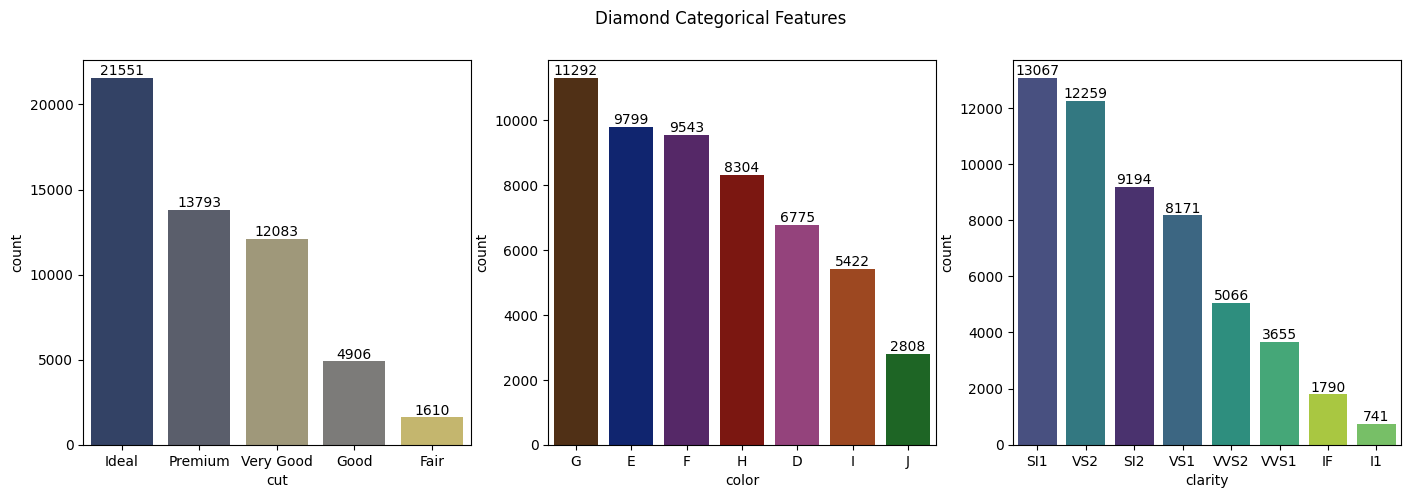

In [25]:


fig, ax = plt.subplots(1, 3, figsize=(17, 5))

def categorical_charts(categ_column, bar_colors, ax_position):
    group = diamonds_df.groupby(categ_column)[categ_column].count()
    sns.countplot(x=categ_column, data=diamonds_df, hue=categ_column, order=group.sort_values(ascending=False).index,
                  palette=bar_colors, ax=ax[ax_position], legend=False)
    [ax[ax_position].bar_label(ax[ax_position].containers[i], label_type='edge') for i in range(len(ax[ax_position].containers))]

categorical_charts('cut', 'cividis', 0)
categorical_charts('color', 'dark', 1)
categorical_charts('clarity', 'viridis', 2)

fig.suptitle('Diamond Categorical Features')

plt.show()

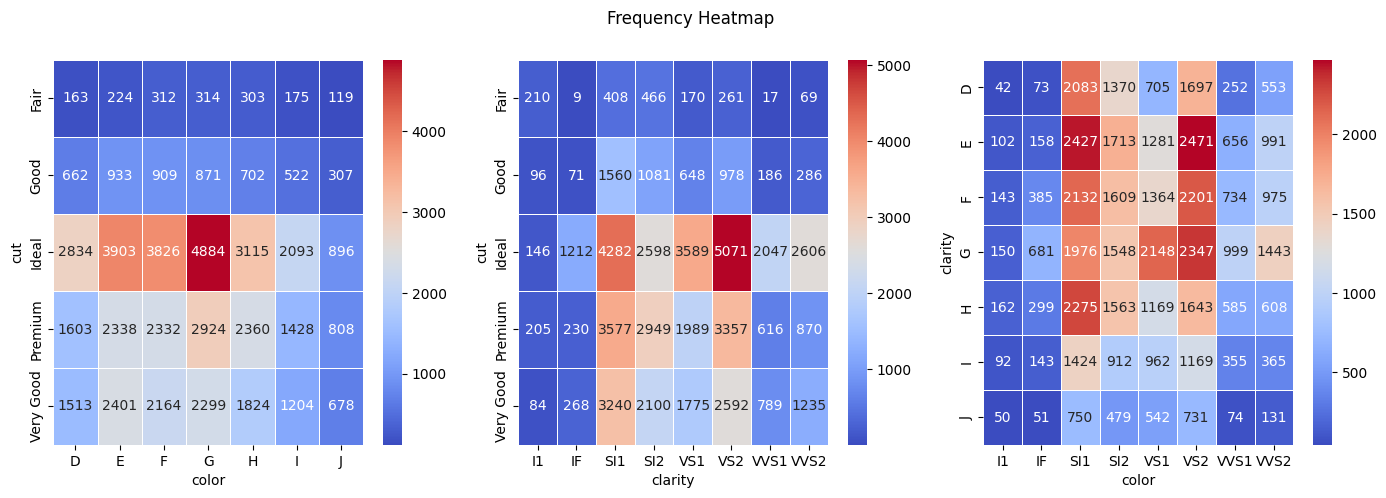

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

for idx, (categ_a, categ_b) in enumerate([('cut', 'color'), ('cut', 'clarity'), ('color', 'clarity')]):
  contingency_table = pd.crosstab(diamonds_df[categ_a], diamonds_df[categ_b])
  sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, ax=ax[idx])

  plt.xlabel(categ_a)
  plt.ylabel(categ_b)

fig.suptitle('Frequency Heatmap')

plt.show()


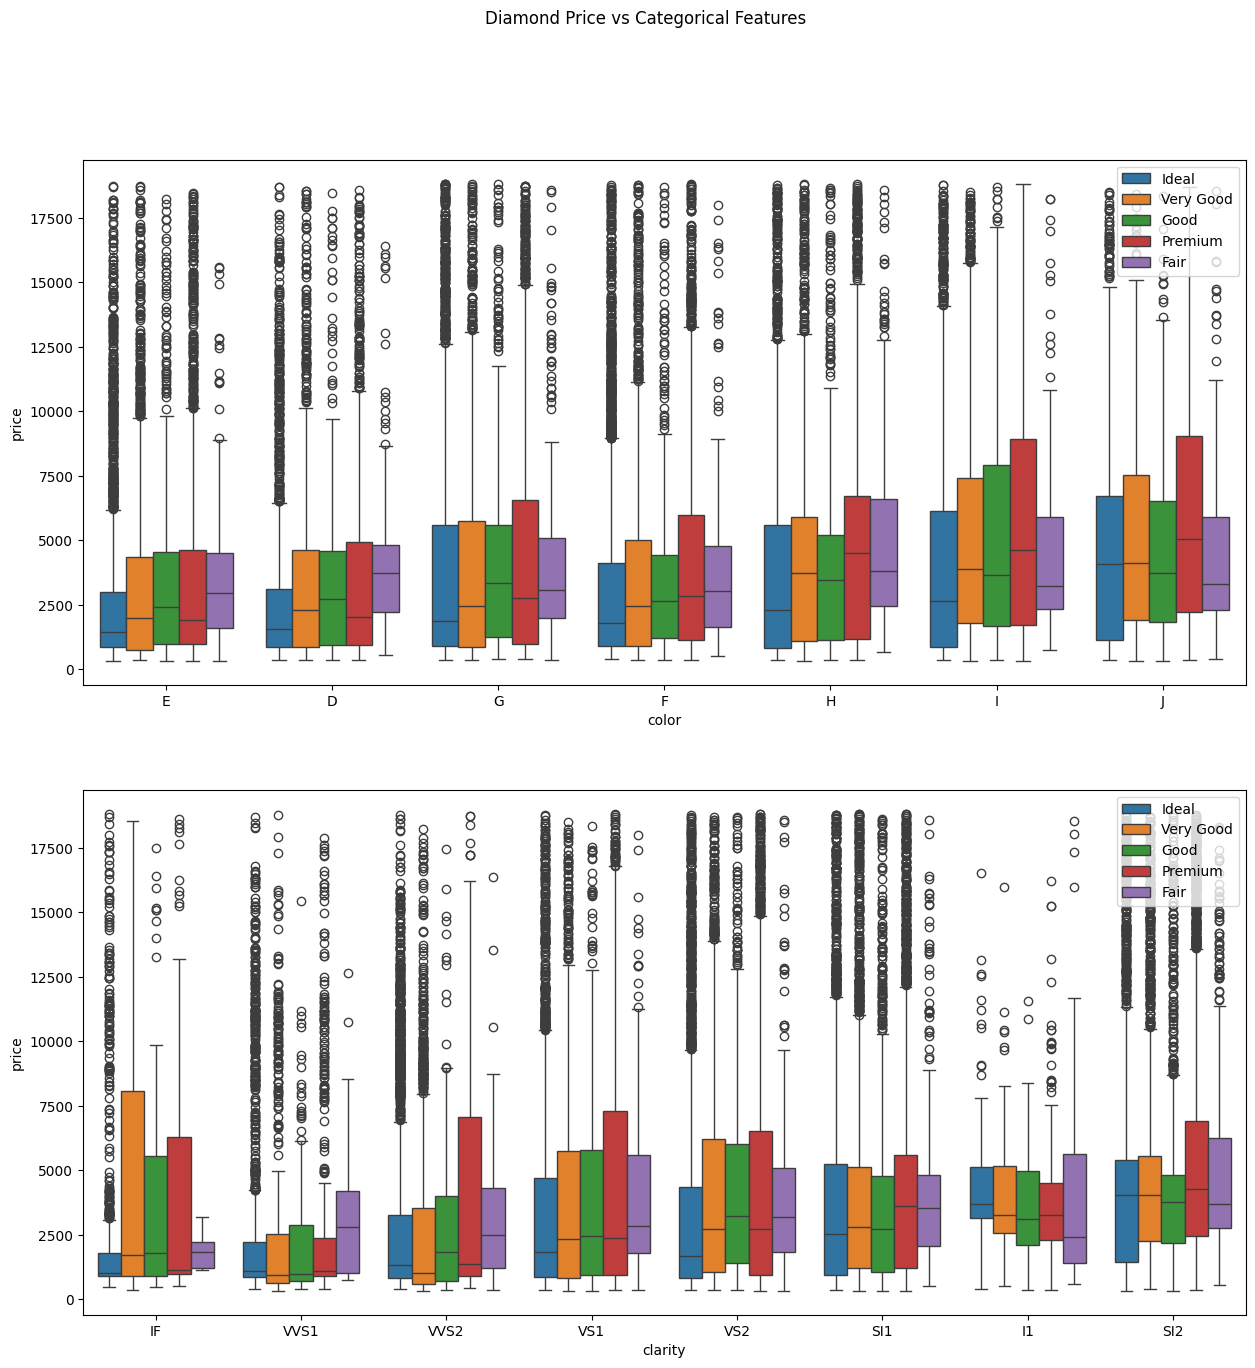

In [53]:
hue_median_order = diamonds_df.groupby('cut')['price'].median().sort_values(ascending=True).index
color_median_order = diamonds_df.groupby('color')['price'].median().sort_values(ascending=True).index
clarity_median_order = diamonds_df.groupby('clarity')['price'].median().sort_values(ascending=True).index

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.boxplot(data=diamonds_df, x='color', y='price', hue='cut', hue_order=hue_median_order, order=color_median_order, ax=ax[0])
sns.boxplot(data=diamonds_df, x='clarity', y='price', hue='cut', hue_order=hue_median_order, order=clarity_median_order, ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

fig.suptitle("Diamond Price vs Categorical Features")

plt.show()

Text(0.5, 0.98, 'Diamond Carat vs Categorical Features')

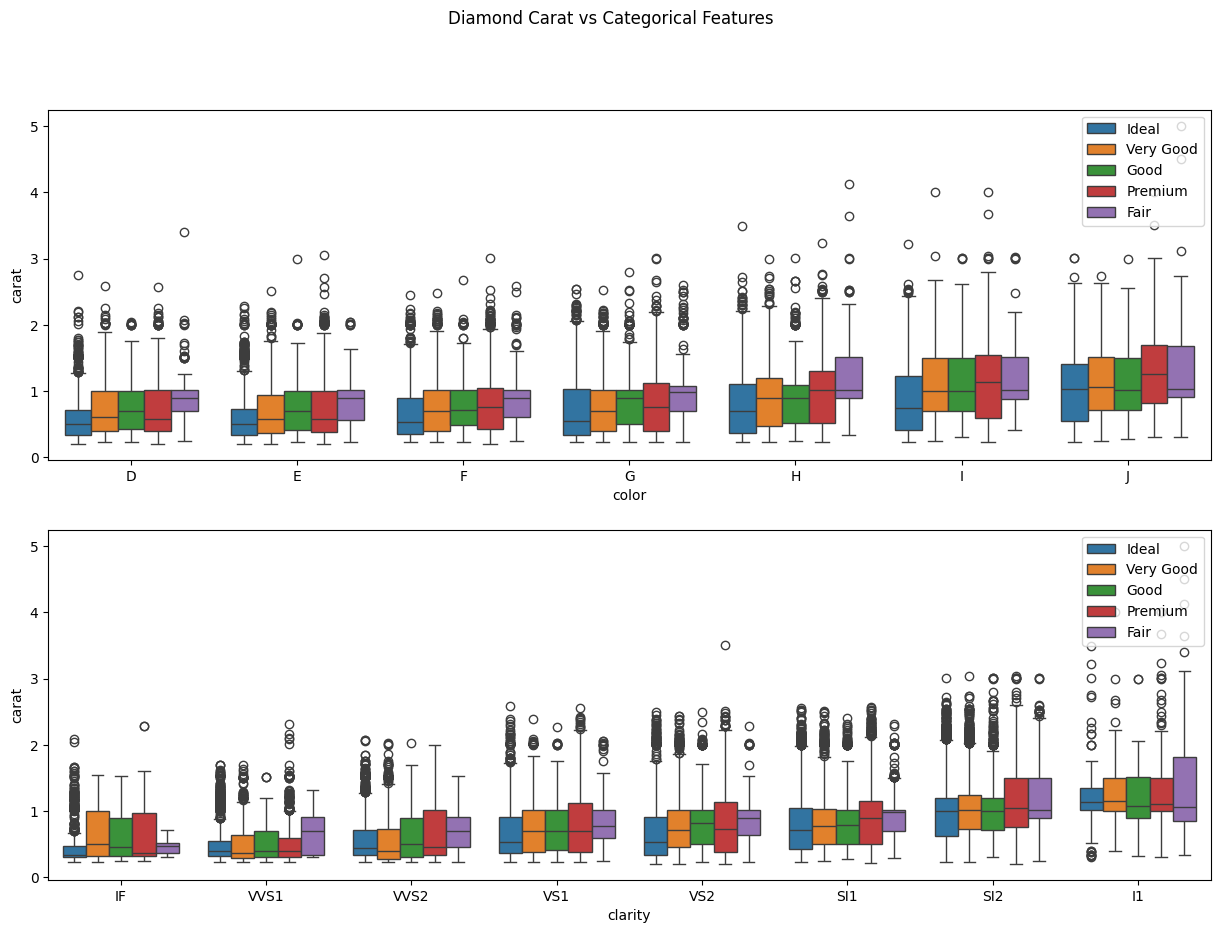

In [54]:
hue_median_order = diamonds_df.groupby('cut')['carat'].median().sort_values(ascending=True).index
color_median_order = diamonds_df.groupby('color')['carat'].median().sort_values(ascending=True).index
clarity_median_order = diamonds_df.groupby('clarity')['carat'].median().sort_values(ascending=True).index

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(data=diamonds_df, x='color', y='carat', hue='cut', hue_order=hue_median_order, order=color_median_order, ax=ax[0])
sns.boxplot(data=diamonds_df, x='clarity', y='carat', hue='cut', hue_order=hue_median_order, order=clarity_median_order, ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

fig.suptitle("Diamond Carat vs Categorical Features")

0 0 price cut
1 0 price color
2 0 price clarity
0 1 carat cut
1 1 carat color
2 1 carat clarity


"\nsns.boxplot(x=diamonds_df['cut'], y=diamonds_df['price'], order=diamonds_df.groupby('cut')['price'].median().sort_values(ascending=True).index, ax=ax[1,0])\nsns.boxplot(x=diamonds_df['color'], y=diamonds_df['price'], order=diamonds_df.groupby('color')['price'].median().sort_values(ascending=True).index, ax=ax[1,1])\nsns.boxplot(x=diamonds_df['clarity'], y=diamonds_df['price'], order=diamonds_df.groupby('clarity')['price'].median().sort_values(ascending=True).index, ax=ax[1,2])\n "

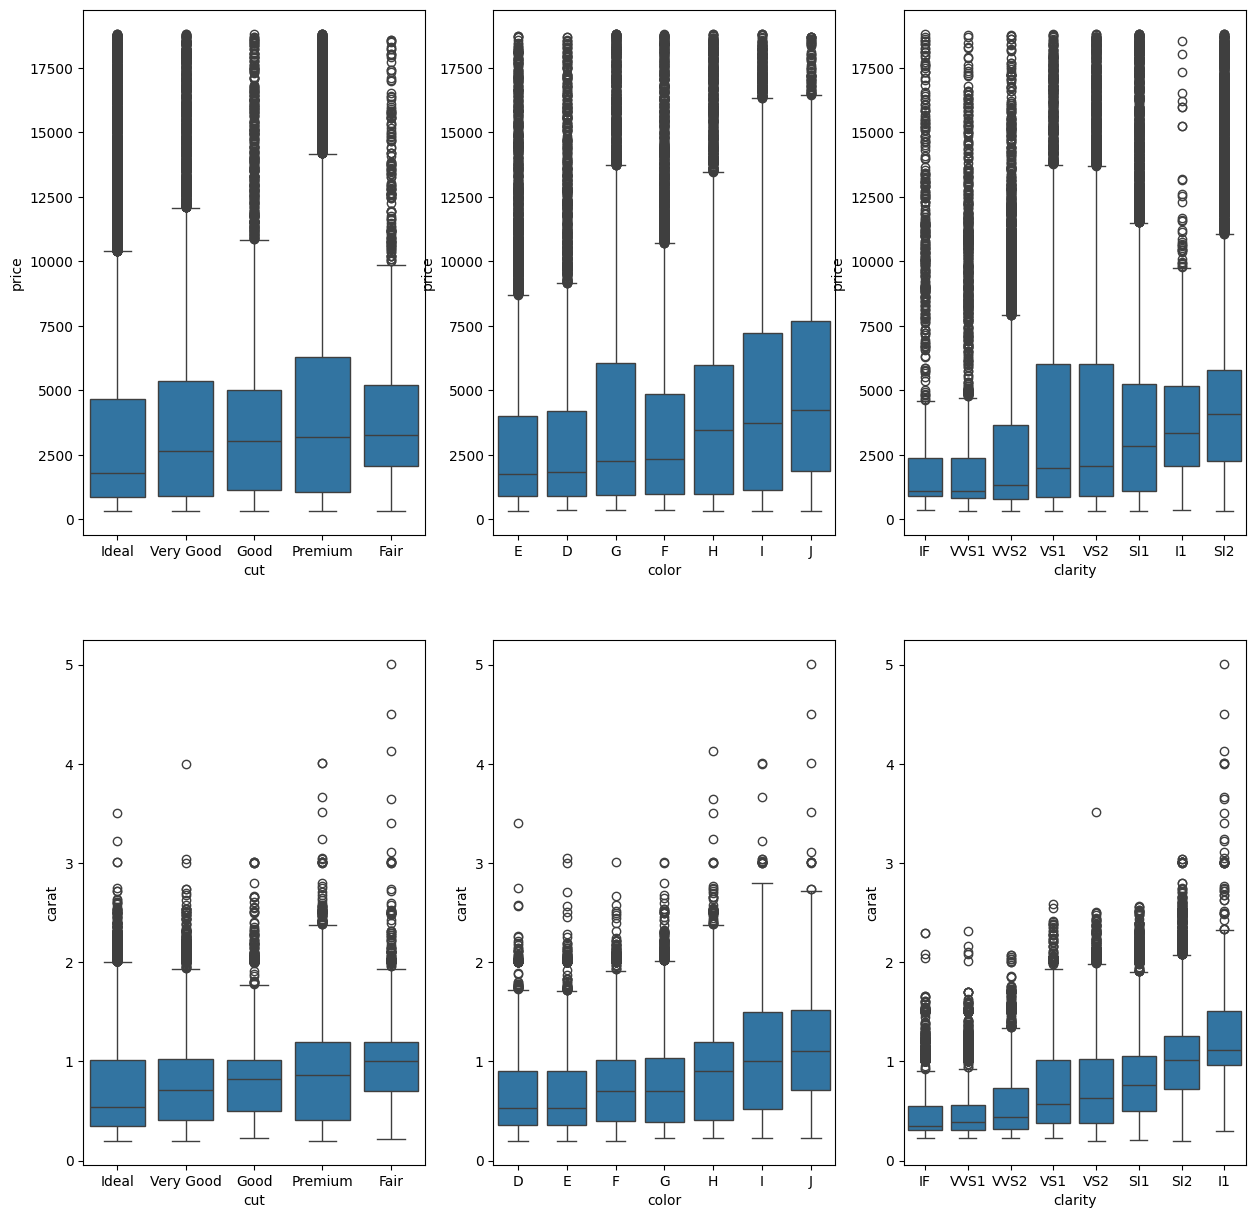

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

def median_order(x, y):
  return diamonds_df.groupby(x)[y].median().sort_values(ascending=True).index

for i, var_y in enumerate(['price', 'carat']):
  for j, var_x in enumerate(['cut', 'color', 'clarity']):
    sns.boxplot(x=diamonds_df[var_x], y=diamonds_df[var_y], order=median_order(var_x, var_y), ax=ax[i,j])



#### Furhter exploratory carat and price analysis

As seen before, the carat strongly affects the price range. Bigger the diamond, the higher the price. The other 3Cs categories add an extra layer by making the same carat weight more expensive due to its characteristics.

In this section, the carat size will be furhter explored to identify patterns and more intrinsic correlations with the other categoric variables present in the dataset.

From the carat histogram, it is identified a tall spike at “round number” or “magic” carat weights (0.25 ct, 0.50 ct, 0.75 ct, 1.00 ct, 1.50 ct …) and far fewer stones at awkward values like 0.47 ct or 0.99 ct. This may be related to market demand.

This behavior shows also an odd little “step” around every magic size break point. For example:
- the bin just to the left of the break point is almost empty (e.g. 0.29 ct, 0.49 ct, 0.99 ct);
- the exact bin and the one just to the right are crowded (e.g. 0.31 ct, 0.51 ct, 1.01 ct).

The scatterplot makes this visible in the sense that a kind of "walls" are observed at each magic breakpoint.
The conclusion is that carat is not a smooth measure and in consequence models that reflect a symmetric distribution will not precisely estimate prices around the cut-offs. This reflects market demand towards specific measurements and qualities.

' import matplotlib.pyplot as plt\nimport numpy as np\n\nx = np.linspace(0, 10, 100)\ny = np.sin(x)\nplt.plot(x, y)\n\n# Set x-ticks at specific intervals\nplt.xticks(np.arange(0, 11, 0.5))\nplt.show() '

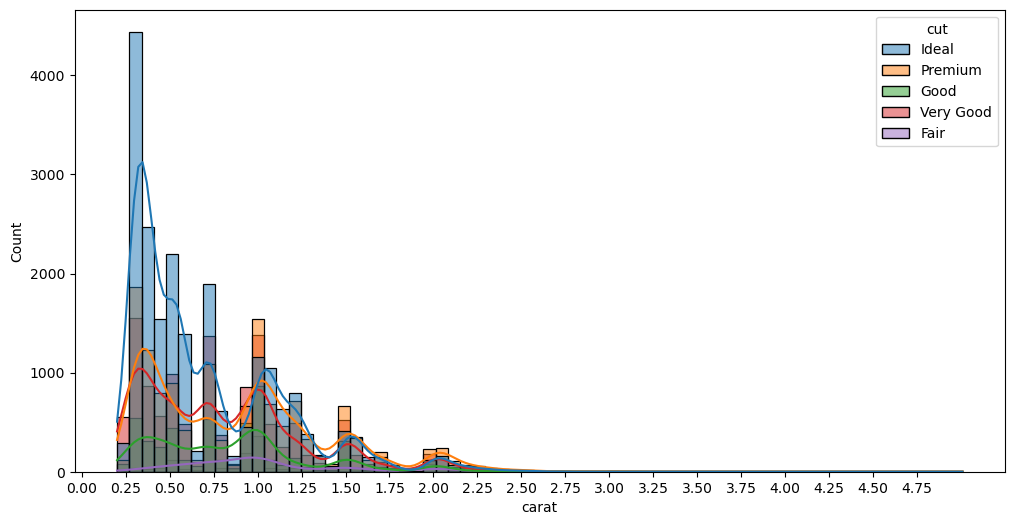

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 5, 0.25))
#sns.histplot(diamonds_df['carat'], kde=True, hue='cut')
sns.histplot(data=diamonds_df, x='carat', hue='cut', binwidth=0.07)


<Axes: xlabel='price', ylabel='Count'>

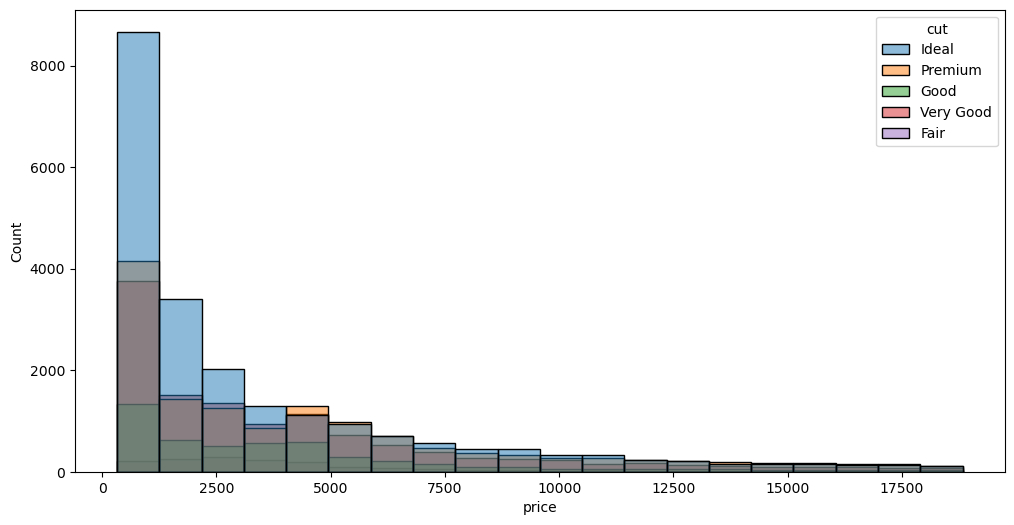

In [ ]:
plt.figure(figsize=(12, 6))
#plt.xticks(np.arange(0, 5, 0.25))
#sns.histplot(diamonds_df['carat'], kde=True, hue='cut')
sns.histplot(data=diamonds_df, x='price', hue='cut', bins=20) #, binwidth=0.07)

The ```lmplot``` (linear model plot) visualization allowing to visualize relationships between variables across a combination of scatter plots and regression model.

The three charts below indicate the regression lines included for each of the categorical variables.

The first chart shows the steeper line referring to the Ideal cut, while the Fair cut is more spread (the band around the line demonstrates that) and shows that the price doesn't grow that fast as the other lines. Likewise, the cuts doesn't offer a very distinguished price difeerention when they are compared to each other.

The same is aboserved for diamond colors. They show grouped together depending how colorless is the diamond, not offering much discrepancy between them.

The Clarity feature regression lines are easier to recognize. It is more clear to observe the mid-point VS2 attribute almost in the middle among all regression lines, oferring the best "cost-carat" benefit.


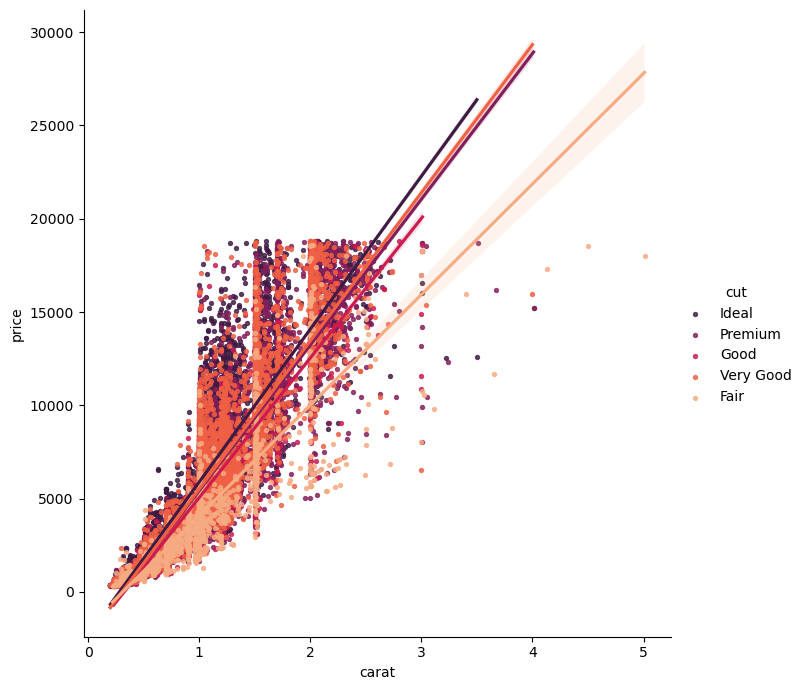

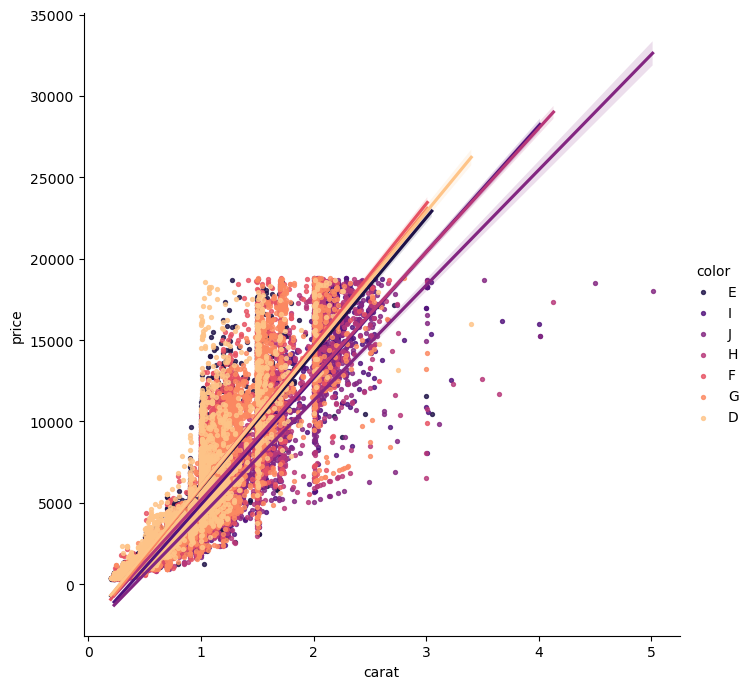

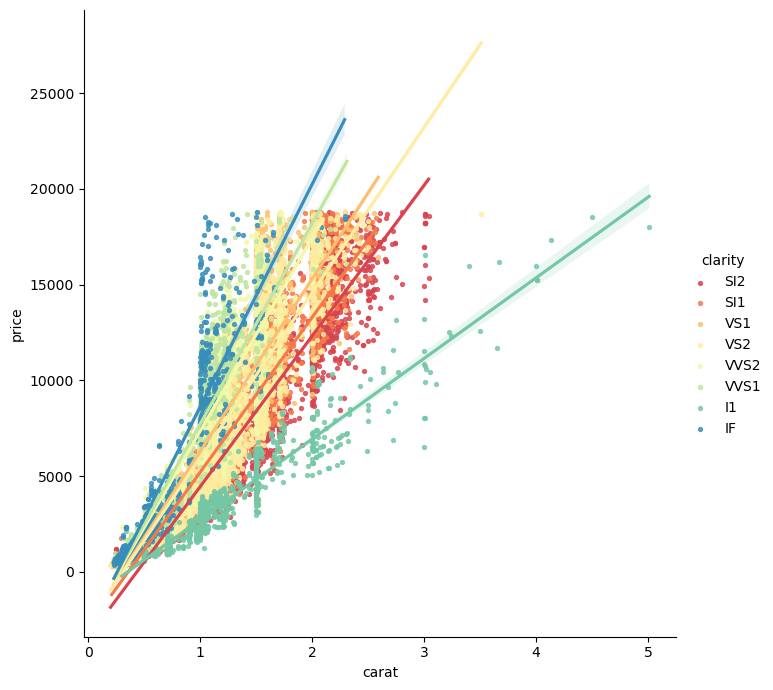

In [ ]:

sns.lmplot(x='carat', y='price', hue='cut', data=diamonds_df, palette='rocket', scatter_kws={"s": 8}, height=7, aspect=1)
sns.lmplot(x='carat', y='price', hue='color', data=diamonds_df, palette='magma', scatter_kws={"s": 8}, height=7, aspect=1)
sns.lmplot(x='carat', y='price', hue='clarity', data=diamonds_df, palette='Spectral', scatter_kws={"s": 8}, height=7, aspect=1)


<Axes: xlabel='carat', ylabel='price'>

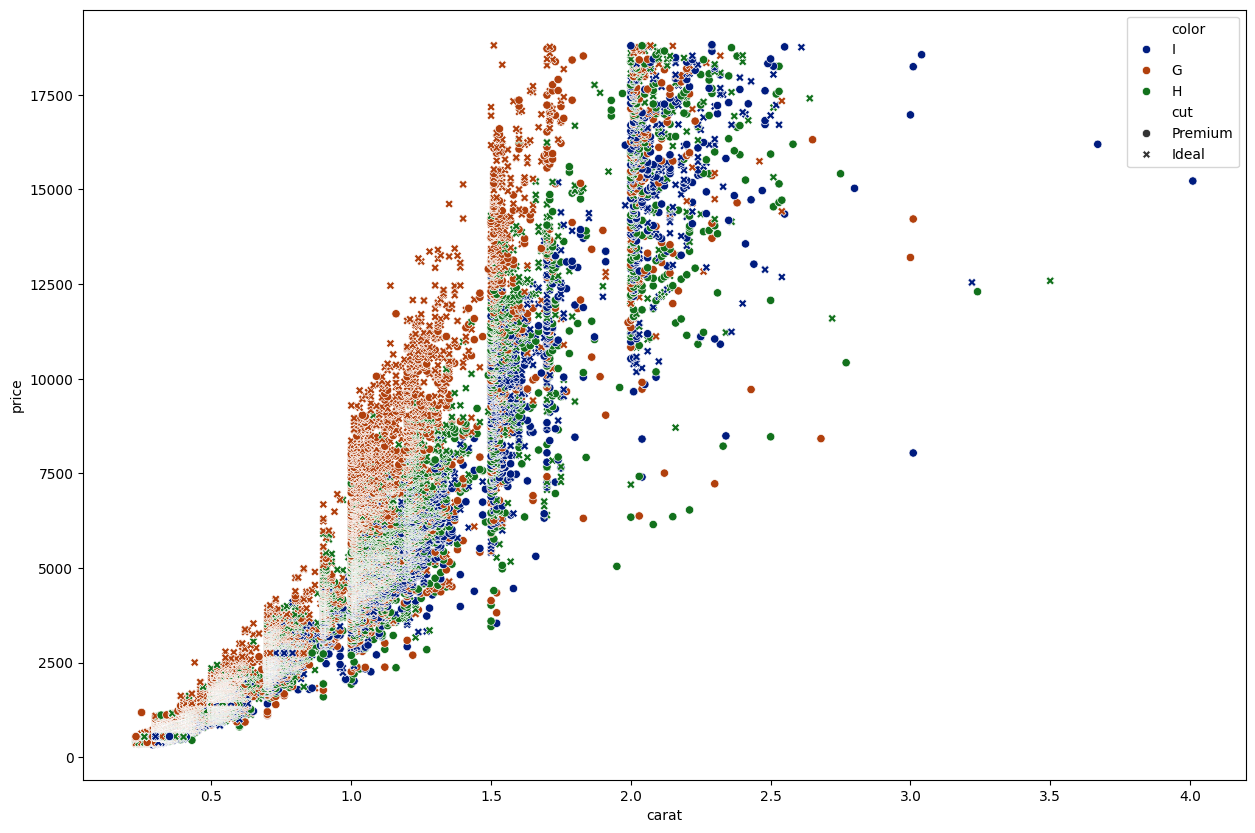

In [55]:
plt.figure(figsize=(15, 10))
filtered_df = diamonds_df[(diamonds_df['color'].isin(['G', 'H', 'I'])) & (diamonds_df['cut'].isin(["Ideal", "Premium"]))]
sns.scatterplot(data=filtered_df, x='carat', y='price', style='cut', hue='color', palette='dark')

#### Table and Depth variable analysis

```Table``` and ```Depth``` are the 2 variables in the diamonds dataset that still haven't been mentioned in the analysis so far (along with the ```x```, ```y```,```z``` ).

The reason they don't receive much focus is explained by main these practical reasons:
1. Low correlation with price as seen from the correlation heatmap below
2. The are very little spread and histograms look like narrow spikes. Visually they just don’t reveal much signal or structure.
3. Looking at measurements, cut categoriacal values and those 2 varaibles, they look similar to cut categorical assigments which has strnger relationship with price (as the above study tries to demonstrate)
4. Analyses and storytelling, are more focused on 4Cs narrative (carat, cut, color, clarity) making correlations more straightforward to explain.

<Axes: >

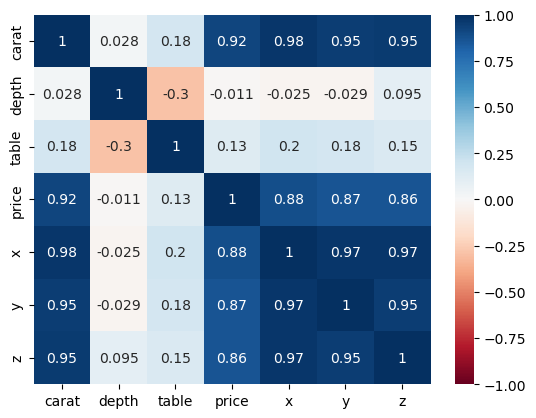

In [ ]:
#diamonds_df = diamonds_df.drop(['price_per_carat'], axis=1)
non_categorical_df = diamonds_df.select_dtypes(exclude='object')
#print(non_categorical_df)
df_corr = non_categorical_df.corr()
sns.heatmap(df_corr, annot=True, cmap='RdBu', vmin=-1, vmax='1')

<Axes: xlabel='table', ylabel='Count'>

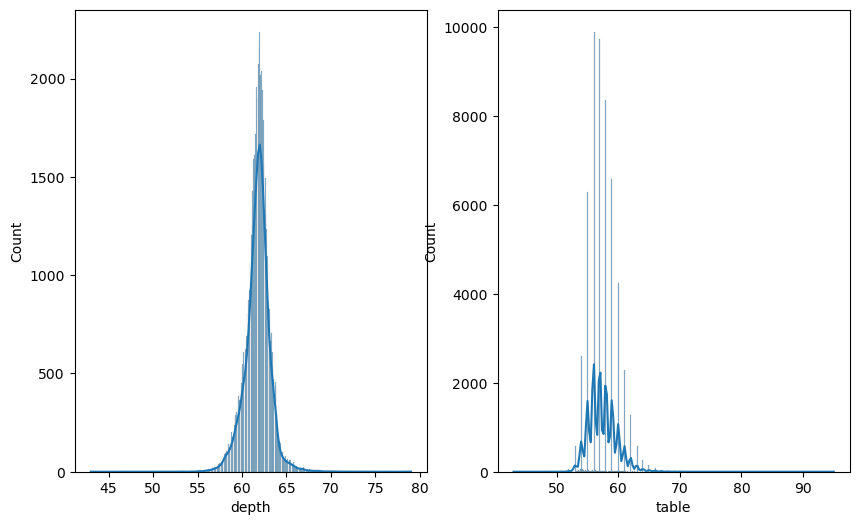

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
#plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(diamonds_df['depth'], kde=True, ax=ax[0])
sns.histplot(diamonds_df['table'], kde=True, ax=ax[1])
#plt.title('Distribuição do Comprimento da Sépala')
#plt.xlabel('Comprimento da Sépala (cm)')
#plt.ylabel('Frequência')
#plt.show()

Text(0.5, 1.0, 'Depth')

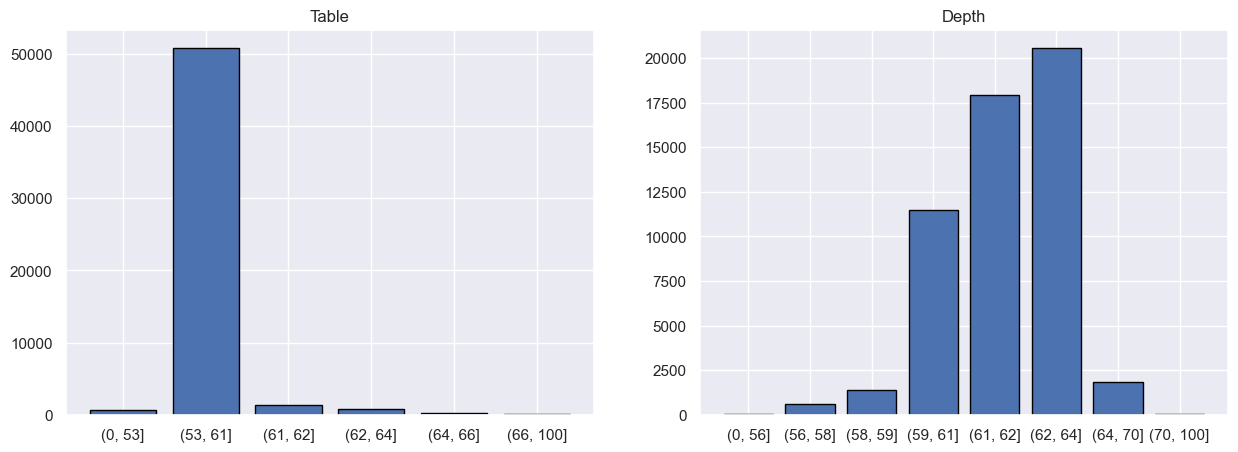

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
categories = pd.cut(diamonds_df['table'], [0, 53, 61, 62, 64, 66, 100])
bin_counts = categories.value_counts(sort=False)
ax[0].bar(bin_counts.index.astype(str), bin_counts.values, edgecolor='black')
ax[0].set_title('Table')

categories = pd.cut(diamonds_df['depth'], [0, 56, 58, 59, 61, 62, 64, 70, 100])
bin_counts = categories.value_counts(sort=False)
ax[1].bar(bin_counts.index.astype(str), bin_counts.values, edgecolor='black')
ax[1].set_title('Depth')



#plt.bar(bin_counts.index.astype(str), bin_counts.values)
#plt.xlabel("Bins")
#plt.ylabel("Frequency")
#plt.title("Histogram with pandas.cut() Bins")
#plt.show()

#### Conclusion

As initially noted, price offers a highly variable distribution carried out by a long tail. Great majority of observations are concentrated between few hundred dollas to arond $ 2500. This directly correlates to smaller carets which are observed as an stardar of the market.
The variation of prices (some of them grow tremenduouly by the same carat) is given by the 3Cs characterists that mold the diamonds aesthetics.

The market demand is also recognized in terms of carats weights being grouped in steps (or blocks) of “round number”.

Some reaserch indicates the clustering data that the market search for diamonds into 3 main segments:

- Bridal budget (0.3–0.6 ct, G–H, SI1–SI2, Very Good)
- Investment/collector (≥ 2 ct, D–F, VVS1–IF, Ideal)
- Value‑maximiser (1 ct range, J–I, SI2–I1, Good)
